In [2]:
import pandas as pd
file_path = "data/clean_data/full_data.csv"
df = pd.read_csv(file_path, sep='\t', encoding='utf-8', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344659 entries, 0 to 344658
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PT      344659 non-null  object 
 1   AU      344659 non-null  object 
 2   TI      344659 non-null  object 
 3   LA      344659 non-null  object 
 4   DE      344659 non-null  object 
 5   AB      344659 non-null  object 
 6   C1      344659 non-null  object 
 7   PY      344659 non-null  float64
dtypes: float64(1), object(7)
memory usage: 21.0+ MB


In [9]:
condition = df.PY.between(2010,2020, inclusive="both")
df = df[condition]


In [11]:
df.PY.describe()

count    306846.000000
mean       2016.227495
std           2.977482
min        2010.000000
25%        2014.000000
50%        2017.000000
75%        2019.000000
max        2020.000000
Name: PY, dtype: float64

In [15]:
df["TXT"] = df["TI"] + " " + df["DE"] + " " + df["AB"]

In [16]:
import spacy
import string
# spacy_pipeline = spacy.load("en_core_web_sm")
def split_into_tokens_spacy(desc) :
    """
    remove stop words + punctuation and tokenise the sentence
    """
    doc = nlp(desc)
    return [w.text.lower() for w in doc if not (w.is_stop or w.text in string.punctuation)]

In [17]:
nlp = spacy.load("en_core_web_sm")

In [18]:
tokens_spacy = df.head(n=1).TXT.apply(split_into_tokens_spacy)[0]
print(tokens_spacy)

['multiobjective', 'stochastic', 'programming', 'recourses', 'real', 'time', 'flood', 'water', 'conservation', 'multireservoir', 'system', 'uncertain', 'forecasts', 'reservoir', 'operation', 'flood', 'water', 'conservation', 'forecast', 'uncertainty', 'stochastic', 'programming', 'recourses', 'multiobjective', 'optimization', 'flood', 'water', 'conservation', 'realized', 'real', 'time', 'multireservoir', 'operations', 'effective', 'mitigating', 'water', 'scarcity', 'owing', 'influence', 'real', 'time', 'inflow', 'forecast', 'uncertainty', 'determining', 'informed', 'operation', 'plan', 'necessitates', 'resolution', 'conflict', 'upstream', 'flood', 'risk', 'downstream', 'flood', 'risk', 'water', 'scarcity', 'risk', 'study', 'developed', 'multiobjective', 'stochastic', 'programming', 'recourses', 'mosp', 'model', 'seek', 'robust', 'risk', 'averse', 'plans', 'multiple', 'risks', 'proposed', 'approach', 'inflow', 'forecast', 'errors', 'modeled', 'sampled', 'spatially', 'temporally', 'corre

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(tokenizer=split_into_tokens_spacy, min_df=0.01)
# Fit --> "apprentissage" du vocabulaire
bow_transformer.fit(df.TXT)
# Vocabulaire final : dimension des vecteurs
print(len(bow_transformer.vocabulary_)) 

2020


In [22]:
 # Vocabulaire
feat_names = bow_transformer.get_feature_names()
feat_names

['/-',
 '0',
 '0.05',
 '0.5',
 '1',
 '1.5',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1990',
 '2',
 '20',
 '200',
 '2000',
 '2003',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2030',
 '2050',
 '21',
 '2100',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '3',
 '30',
 '35',
 '4',
 '40',
 '45',
 '5',
 '50',
 '500',
 '6',
 '60',
 '7',
 '70',
 '8',
 '80',
 '9',
 '90',
 '95',
 'ability',
 'abiotic',
 'able',
 'absence',
 'absolute',
 'abundance',
 'abundant',
 'access',
 'according',
 'account',
 'accounted',
 'accounting',
 'accumulation',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achieving',
 'acid',
 'acidification',
 'act',
 'action',
 'actions',
 'active',
 'activities',
 'activity',
 'actors',
 'actual',
 'adapt',
 'adaptation',
 'adapted',
 'adaptive',
 'added',
 'addition',
 'additional',
 'additionally',
 '

In [23]:
# Transformation de toutes les descriptions en sac de mots
descriptions_bow = bow_transformer.transform(df.TXT)

In [24]:
# Fréquences des mots et 10 mots les plus fréquents
from collections import Counter

frequencies = Counter()
for i, tok in enumerate(feat_names):
    frequencies[tok] = descriptions_bow.getcol(i).sum()
print(frequencies.most_common(10))

[('climate', 498274), ('change', 355234), ('water', 233518), ('environmental', 223443), ('study', 204778), ('energy', 199522), ('model', 184654), ('species', 176288), ('results', 167037), ('data', 166275)]


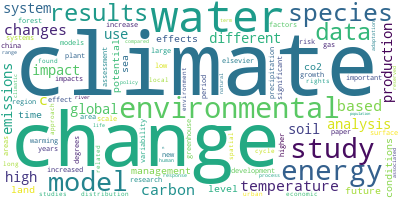

In [25]:
# Nuage de mots
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequencies)
wordcloud.to_image()
wordcloud.to_file("img/worldcloud.png")
wordcloud.to_image()

In [26]:
from gensim.matutils import Sparse2Corpus
from gensim.models.ldamodel import LdaModel

# Transformation du sac de mots au format attendu par Gensim
corpus_bow = Sparse2Corpus(descriptions_bow, documents_columns=False)
# Dictionnaire associant les identifiants des mots du vocabulaire au mot correspondant
id_2_word_dict = {i:feat_names[i] for i in range(len(feat_names))}
# Estimation du modèle LDA à partir du corpus
# Pour une explication des paramètres, voir https://radimrehurek.com/gensim/models/ldamodel.html
lda_model = LdaModel(corpus=corpus_bow, 
                     id2word=id_2_word_dict, 
                     num_topics=5, chunksize=250, 
                     passes=10, per_word_topics=True,
                     random_state=40)
# Récupération des topics
all_topics = lda_model.print_topics(num_words=20)

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [27]:
import pyLDAvis
import pyLDAvis.gensim_models
from gensim.corpora.dictionary import Dictionary

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_bow, 
                                     Dictionary.from_corpus(corpus_bow, id_2_word_dict),
                                     sort_topics=False)
# Sauvegarde de la visualisation dans un fichier
pyLDAvis.save_html(vis, 'winemag_lda.html')

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [28]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.144924  0.156284       1        1  23.129097
1     -0.074444 -0.056965       2        1  22.477498
2     -0.172153  0.046745       3        1  14.112769
3     -0.081684 -0.029954       4        1  21.352912
4      0.183357 -0.116110       5        1  18.927724, topic_info=           Term           Freq          Total Category  logprob  loglift
656      energy  187968.000000  187968.000000  Default  30.0000  30.0000
1760    species  166460.000000  166460.000000  Default  29.0000  29.0000
1741       soil  147513.000000  147513.000000  Default  28.0000  28.0000
649   emissions  123414.000000  123414.000000  Default  27.0000  27.0000
1656        sea   97599.000000   97599.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
1939        use   38308.713845  123632.809011   Topic5  -5.1455   0.4929
154    analysis   36753.027687  135813.856715   Topic5  -5.1869   0.3575
1847    systems   32248.972221   77297.239184   Topic5  -5.3177   0.7904
1398  potential   32854.578629   98198.179697   Topic5  -5.2991   0.5696
268           c   34074.760239  134756.066322   Topic5  -5.2626   0.2896

[360 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
42        4  0.999936       2100
74        2  0.922649  abundance
74        3  0.077307  abundance
82        4  0.958157   accuracy
82        5  0.041844   accuracy
...     ...       ...        ...
2004      5  0.268141       wind
2014      2  0.871122      yield
2014      4  0.064642      yield
2014      5  0.064220      yield
2016      3  0.999956         yr

[646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5])

In [ ]:
ngram_transformer = CountVectorizer(tokenizer=split_into_tokens_spacy, 
                                    
                                    min_df=10, ngram_range=(2,3))
ngram_transformer.fit(df.TXT)

bigram_vectors = ngram_transformer.transform(docs)
ngram_feat_names = ngram_transformer.get_feature_names()
# DataFrame constuit avec les représentations sac de mots
bigram_matrix = pd.DataFrame(bigram_vectors.toarray(), columns=ngram_feat_names)
# Suppression des mots du vocabulaire ne se trouvant pas dans 
# les deux descriptions considérées
bigram_matrix.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

/home/kevin-main/anaconda3/envs/datascience/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [33]:
frequencies = Counter()
for i, tok in enumerate(ngram_feat_names):
    frequencies[tok] = descriptions_bow.getcol(i).sum()
print(frequencies.most_common(10))

NameError: name 'ngram_feat_names' is not defined